In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [8]:
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
final_df=pd.read_csv("cleaned_ground_truth_rerun_full_PRJ_table_invariant_fixed.csv",index_col=0)
keys=['num_workers','objid','thresh','J [MV]', u'J [GT]', u'J [basic]', u'J [GTLSA]', u'J [isoGT]','J [isoGTLSA]']

#### Result from best performing parameter for each algo

In [19]:
for algo in ['basic','MV','GT','GTLSA','isoGT','isoGTLSA']:
    print algo,": %.3f" %newdf.groupby(["num_workers","sample_num","objid"])["J [{}]".format(algo)].max().mean()

basic : 0.893
MV : 0.882
GT : 0.898
GTLSA : 0.884
isoGT : 0.911
isoGTLSA : 0.912


### Objects where GTLSA performs badly 

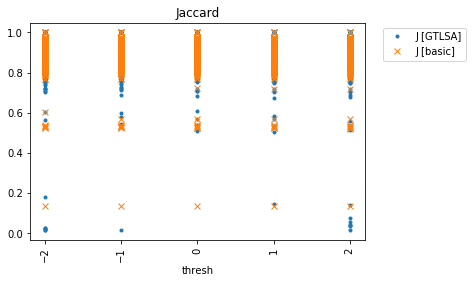

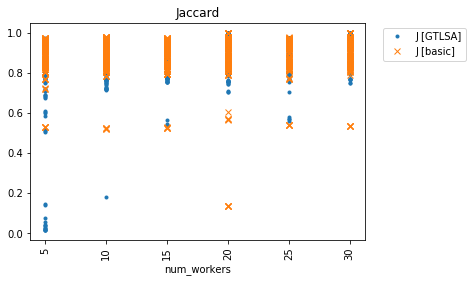

In [20]:
compare_PRJ_fixed_attr(final_df,"thresh","GTLSA","basic",'J')
compare_PRJ_fixed_attr(final_df,"num_workers","GTLSA","basic",'J')

In [23]:
final_df[final_df["J [GTLSA]"]<0.3][keys]

,num_workers,objid,thresh,J [MV],J [GT],J [basic],J [GTLSA],J [isoGT],J [isoGTLSA]
87,5,7,-2,0.529387,0.536744,0.529387,0.014117,0.554982,0.558377
88,5,7,-1,0.529387,0.536744,0.529387,0.014117,0.559589,0.559941
91,5,7,2,0.529387,0.536744,0.529387,0.054795,0.524335,0.516338
132,5,2,2,0.928316,0.917808,0.928316,0.033390,0.920753,0.822462
157,5,10,2,0.941518,0.943766,0.941518,0.039686,0.948033,0.894728
183,5,19,-2,0.846169,0.871913,0.846169,0.025171,0.857520,0.877196
193,5,21,-2,0.912607,0.935452,0.912607,0.021104,0.937921,0.936441
207,5,23,2,0.890073,0.911436,0.890073,0.072951,0.882835,0.887907
242,5,30,2,0.866914,0.866914,0.881969,0.042034,0.857201,0.816340
282,5,39,2,0.973194,0.973194,0.973194,0.016331,0.971443,0.978188


In [22]:
final_df[(final_df["num_workers"]==10)&(final_df["objid"]==29)&(final_df["thresh"]==-2)][keys]

,num_workers,objid,thresh,J [MV],J [GT],J [basic],J [GTLSA],J [isoGT],J [isoGTLSA]
766,10,29,-2,0.843378,0.808541,0.828303,0.180898,0.808562,0.721073


task is to circle around the flower

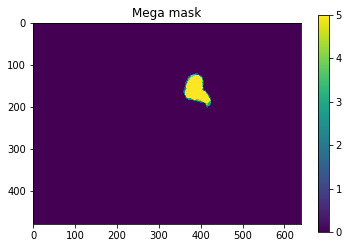

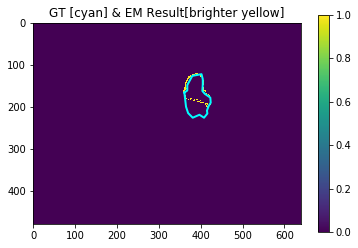

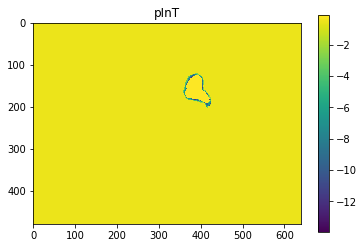

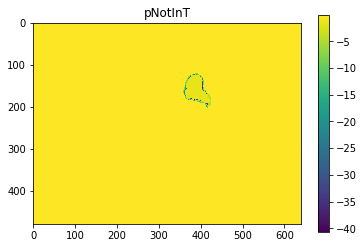

In [46]:
mega_mask,result, gt_mask,pInT,pNotInT =  plot_masks("5workers_rand0",7,2,"GTLSA",returnMatrix=True)

In [28]:
def load_qn1_qp1_qn2_qp2(batch,objid,thresh):
    algo="GTLSA"
    qn1 = pkl.load(open("pixel_em/{}/obj{}/{}_qn1_ground_truth_thresh{}.pkl".format(batch,objid,algo,thresh)))
    qp1 = pkl.load(open("pixel_em/{}/obj{}/{}_qp1_ground_truth_thresh{}.pkl".format(batch,objid,algo,thresh)))
    qn2 = pkl.load(open("pixel_em/{}/obj{}/{}_qn2_ground_truth_thresh{}.pkl".format(batch,objid,algo,thresh)))
    qp2 = pkl.load(open("pixel_em/{}/obj{}/{}_qp2_ground_truth_thresh{}.pkl".format(batch,objid,algo,thresh)))
    return qn1,qp1,qn2,qp2

In [29]:
qn1,qp1,qn2,qp2=load_qn1_qp1_qn2_qp2("5workers_rand0",7,2)

### Why is the qn1 so low for all workers?

In [30]:
qn1

{9: 0.2872340425531915,
 140: 0.3546099290780142,
 187: 0.20212765957446807,
 249: 0.20567375886524822,
 267: 0.2907801418439716}

In [31]:
qp1

{9: 0.9634722819080361,
 140: 0.9974215728405672,
 187: 0.9626128061882252,
 249: 1.0,
 267: 0.99054576708208}

In [32]:
qn2

{9: 0.9995205391124352,
 140: 0.9998677349275683,
 187: 0.9993882740400035,
 249: 0.9996627240652992,
 267: 0.999841281913082}

In [33]:
qp2

{9: 0.09178966789667897,
 140: 0.15129151291512916,
 187: 0.04981549815498155,
 249: 0.117619926199262,
 267: 0.07564575645756458}

Let's look at the distribution of tile area mask and see if it looks accurate

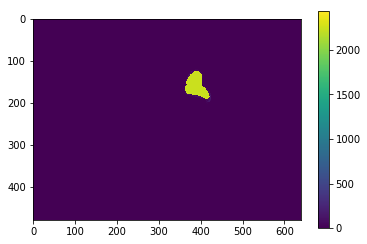

In [36]:
tarea_mask = pkl.load(open("pixel_em/5workers_rand0/obj7/tarea_mask.pkl"))

plt.imshow(tarea_mask)
plt.colorbar()

In [48]:
gt_areas = tarea_mask[np.where(gt_mask == True)]
ngt_areas = tarea_mask[np.where(gt_mask == False)]
area_thresh_gt = np.median(list(set(gt_areas)))
area_thresh_ngt = np.median(list(set(ngt_areas)))

In [49]:
print area_thresh_gt
print area_thresh_ngt

98.543017954
48.1880610161


In [53]:
print len(np.where(gt_areas<area_thresh_gt)[0])
print len(np.where(gt_areas>=area_thresh_gt)[0])

2168
2327


In [54]:
print len(np.where(ngt_areas<area_thresh_ngt)[0])
print len(np.where(ngt_areas>=area_thresh_ngt)[0])

302423
282


In [75]:
area_thresh_gt = np.median(gt_areas)
area_thresh_ngt = np.median(ngt_areas)

In [78]:
print area_thresh_gt
print area_thresh_ngt

171.872457742
0.0


In [76]:
print len(np.where(gt_areas<area_thresh_gt)[0])
print len(np.where(gt_areas>=area_thresh_gt)[0])

2246
2249


In [77]:
print len(np.where(ngt_areas<area_thresh_ngt)[0])
print len(np.where(ngt_areas>=area_thresh_ngt)[0])

0
302705


In [55]:
# list(set(tarea_mask.flatten()))

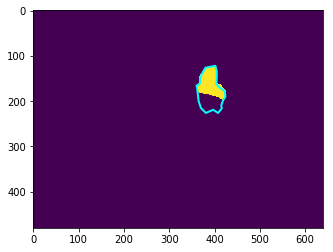

In [56]:
worker_mask = pkl.load(open("pixel_em/obj7/mask140.pkl"))
plt.imshow(worker_mask)
plot_coords(ground_truth_T(7,reverse_xy=True),'cyan')

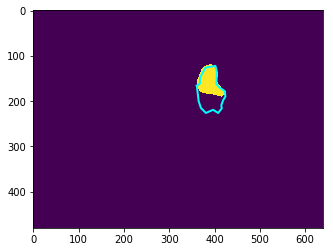

In [79]:
worker_mask = pkl.load(open("pixel_em/obj7/mask9.pkl"))
plt.imshow(worker_mask)
plot_coords(ground_truth_T(7,reverse_xy=True),'cyan')

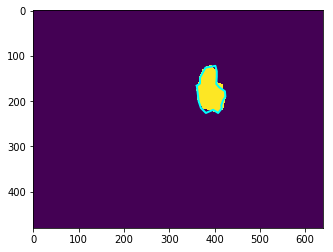

In [81]:
worker_mask = pkl.load(open("pixel_em/obj7/mask247.pkl"))
plt.imshow(worker_mask)
plot_coords(ground_truth_T(7,reverse_xy=True),'cyan')

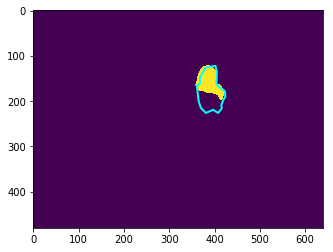

In [80]:
worker_mask = pkl.load(open("pixel_em/obj7/mask187.pkl"))
plt.imshow(worker_mask)
plot_coords(ground_truth_T(7,reverse_xy=True),'cyan')

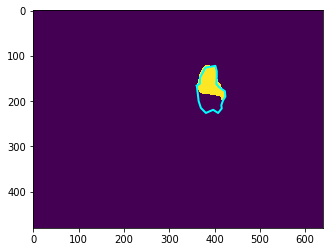

In [82]:
worker_mask = pkl.load(open("pixel_em/obj7/mask249.pkl"))
plt.imshow(worker_mask)
plot_coords(ground_truth_T(7,reverse_xy=True),'cyan')